# Решение тестового задания при отборе на стажировку в М.Тех_DS

**Содержание ноутбука**
1. Импорт необходимых библиотек
2. Загрузка данных и их предварительная обработка
3. Исследовательский анализ данных (EDA-анализ)
4. Проверка статистических гипотез
  * 4.1 Проверка 1-й гипотезы
  * 4.2 Проверка 2-й гипотезы

## 1.Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Загрузка данных и их предварительная обработка

При непосредственной загрузке данных файла .csv в датафрейм возникла ошибка кодировки. Для решения этой проблемы воспользуемся библиотекой **chardet для автоматического распознавания кодировки**

In [2]:
with open('М.Тех_Данные_к_ТЗ_DS.csv', 'rb') as f:
    result = chardet.detect(f.read())

data = pd.read_csv('М.Тех_Данные_к_ТЗ_DS.csv', encoding=result['encoding'])
data

,"Количество больничных дней,""Возраст"",""Пол"""
0,"5,39,""Ж"""
1,"4,54,""М"""
2,"4,26,""М"""
3,"5,42,""М"""
4,"4,29,""М"""
...,...
232,"5,30,""М"""
233,"4,36,""Ж"""
234,"2,60,""Ж"""
235,"2,44,""Ж"""


Теперь необходимо привести полученный датафрейм к более приемлемому виду: **разделить на столбцы, убрать лишние запятые, кавычки**

In [3]:
data.shape

(237, 1)

In [4]:
strings = []  # Строки датафрейма
for i in range(data.shape[0]):
    strings.append(data.iloc[i, 0].split(','))
column_0 = []  # 0-й столбец
column_1 = []  # 1-й столбец
column_2 = []  # 2-й столбец
for i in strings:
    column_0.append(i[0])
    column_1.append(i[1])
    column_2.append(i[2])
new_data = pd.DataFrame({'Количество больничных дней': column_0,
                         'Возраст': column_1,
                         'Пол': column_2})
data = new_data
data.head()

,Количество больничных дней,Возраст,Пол
0,5,39,"""Ж"""
1,4,54,"""М"""
2,4,26,"""М"""
3,5,42,"""М"""
4,4,29,"""М"""


Отлично! Но это еще не все. Заметим, что в первых двух столбцах тип переменной - str. Необходимо изменить их на int

In [5]:
type(data.iloc[0, 0]), type(data.iloc[0, 1])

(str, str)

In [6]:
data['Количество больничных дней'] = data['Количество больничных дней'].astype(int)
data['Возраст'] = data['Возраст'].astype(int)
type(data.iloc[0, 0]), type(data.iloc[0, 1])

(numpy.int32, numpy.int32)

Теперь уберем кавычки с элементов третьего столбца

In [7]:
for i in range(data.shape[0]):
    if data.loc[i, 'Пол'] == '"М"':
        data.loc[i, 'Пол'] = 'М'
    else:
        data.loc[i, 'Пол'] = 'Ж'
data.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


## 3.Исследовательский анализ данных (EDA-анализ)

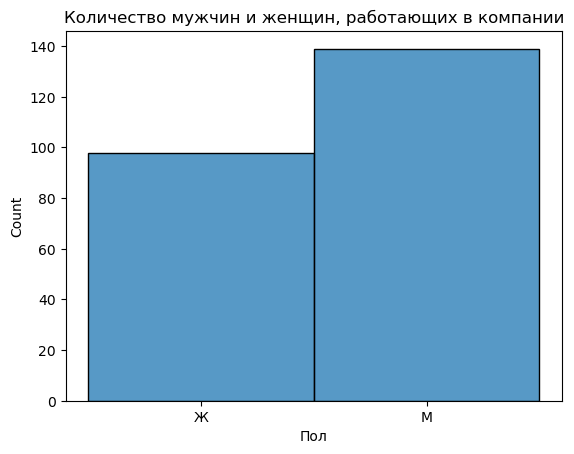

In [8]:
sns.histplot(data=data['Пол'])
plt.title('Количество мужчин и женщин, работающих в компании')
plt.show()

In [9]:
print(f"Мужчин работает в "
      f"{round(data.loc[data['Пол'] == 'М', 'Пол'].count() / data.loc[data['Пол'] == 'Ж', 'Пол'].count(), 2)}"
      f" раза больше, чем женщин")

Мужчин работает в 1.42 раза больше, чем женщин


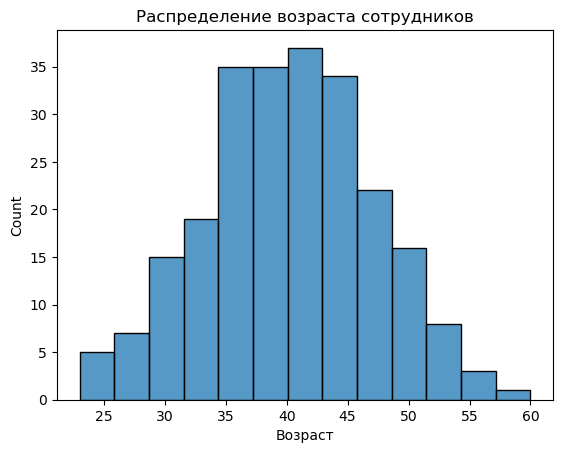

In [10]:
sns.histplot(data=data['Возраст'])
plt.title('Распределение возраста сотрудников')
plt.show()

Большая часть сотрудников находится в диапазоне от 35 до 45 лет

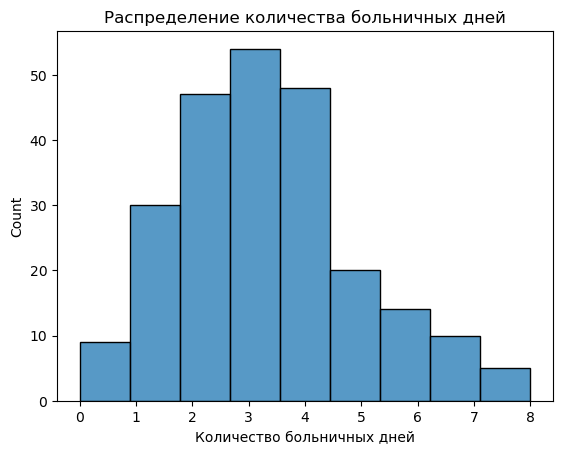

In [11]:
sns.histplot(data=data['Количество больничных дней'], bins=9)
plt.title('Распределение количества больничных дней')
plt.show()

Большая часть сотрудников в течение года пропускает от 2 до 4 дней по болезни

Text(0.5, 1.0, 'Среди женщин')

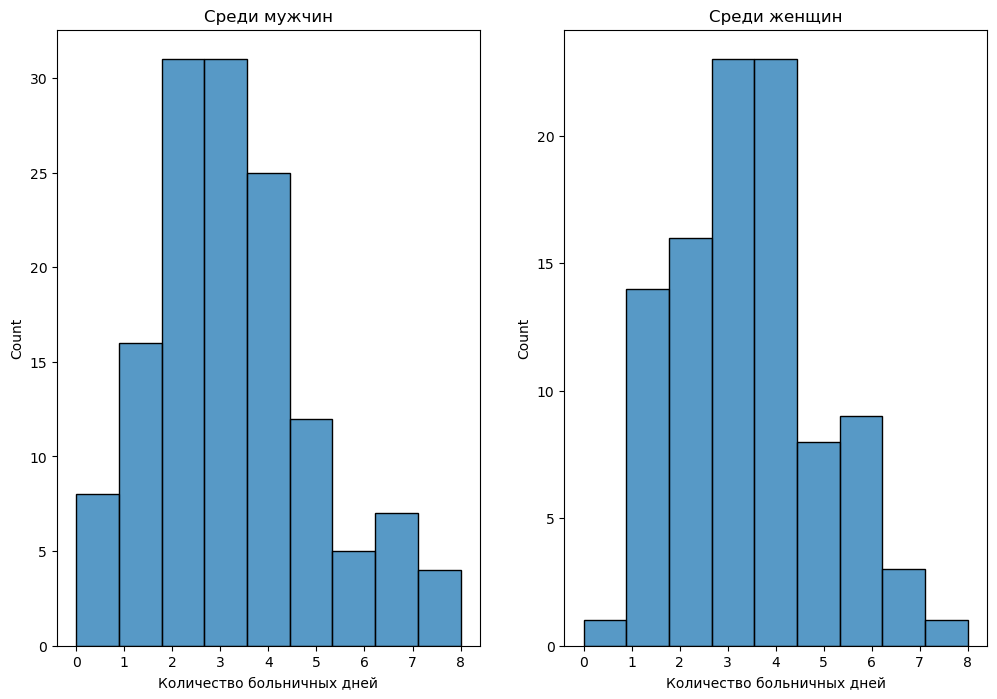

In [12]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.histplot(data=data.loc[data['Пол'] == 'М', 'Количество больничных дней'], bins=9)
plt.title('Среди мужчин')

plt.subplot(1, 2, 2)
sns.histplot(data=data.loc[data['Пол'] == 'Ж', 'Количество больничных дней'], bins=9)
plt.title('Среди женщин')

Из гистограмм распределения замечаем, что среди мужчин пропусков по болезни заметно больше

Text(0.5, 1.0, 'Моложе 35')

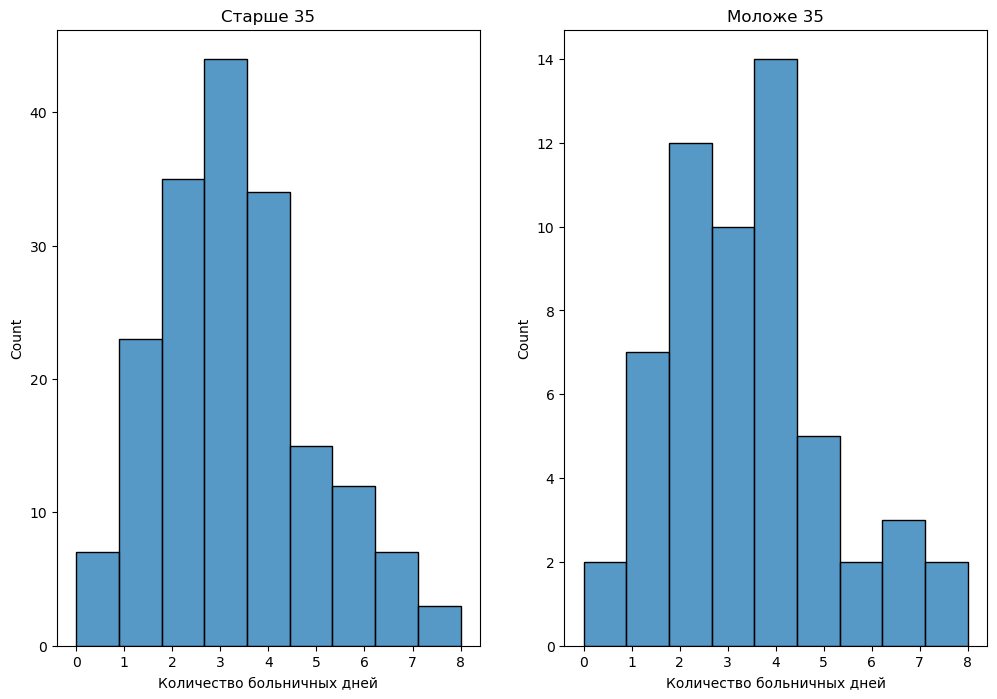

In [13]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.histplot(data=data.loc[data['Возраст'] > 35, 'Количество больничных дней'], bins=9)
plt.title('Старше 35')

plt.subplot(1, 2, 2)
sns.histplot(data=data.loc[data['Возраст'] <= 35, 'Количество больничных дней'], bins=9)
plt.title('Моложе 35')

Из гистограмм распределения замечаем, что среди сотрудников старше 35 лет пропусков по болезни значительно больше, чем у их молодых коллег

## 4.Проверка статистических гипотез

Создадим необходимые функции для последующей работы

In [14]:
def sqrt(x):  # Функция квадратного корня
    return x ** (0.5)

In [15]:
def st_norm(x, mu, sigma):  # Функция плотности стандартного нормального распределения
    return 1 / (sigma * sqrt(2 * np.pi)) * np.e ** (-0.5 * ((x - mu) / sigma) ** 2)

In [16]:
def sample_mean(df):  # Функция выборочного среднего для количества больничных дней
    summ = 0
    for i in range(df.shape[0]):
        summ += df.loc[i, 'Количество больничных дней']
    return summ / df.shape[0]

In [17]:
def sample_disp(df):  # Функция выборочной дисперсии для количества больничных дней
    summ = 0
    for i in range(df.shape[0]):
        summ += (df.loc[i, 'Количество больничных дней'] - sample_mean(df)) ** 2
    return summ / df.shape[0]

In [18]:
def z_test(mean1, mean2, disp1, disp2, n, m):  # Приближенный z-критерий Фишера
    return (mean1 - mean2) / sqrt(disp1 / n + disp2 / m)

In [19]:
class Laplace():  # Класс для работы с функцией Лапласа
    def __init__(self):
        pass
    
    def value(self, x):  # Метод для определения значения функции Лапласа по входному аргументу
        summ = 0
        points = np.linspace(0, x, 2000)
        for i in range(len(points) - 1):
            summ += 0.5 *(np.e ** (-(points[i]) ** 2 / 2) + np.e ** (-(points[i]) ** 2 / 2)) * (points[i + 1] - points[i])
        summ = 1 / sqrt(2 * np.pi) * summ
        return summ
    
    def create_table(self):  # Метод для создания таблицы значений функции Лапласа
        x = np.linspace(0, 5, 1001)
        y = []
        for i in x:
            y.append(Laplace().value(i))
        table = pd.DataFrame({'x': x,
                 'F(x)': y})
        self.table = table
        
    def argument(self, val):  # 
        min_diff = np.inf
        answer_index = 0
        for i in range(self.table.shape[0]):
            if abs(self.table.loc[i, 'F(x)'] - val) < min_diff:
                min_diff = abs(self.table.loc[i, 'F(x)'] - val)
                answer_index = i
        return self.table.loc[answer_index, 'x']        

In [20]:
def arg(laplace, val):  # Функция для определения аргумента функции Лапласа по её значению
    min_diff = np.inf
    answer_index = 0
    for i in range(laplace.table.shape[0]):
        if abs(laplace.table.loc[i, 'F(x)'] - val) < min_diff:
             min_diff = abs(laplace.table.loc[i, 'F(x)'] - val)
             answer_index = i
    return laplace.table.loc[answer_index, 'x']

Создадим таблицу значений функции Лапласа

In [21]:
laplace = Laplace()
laplace.create_table()
laplace.table.head()

,x,F(x)
0,0.000,0.000000
1,0.005,0.001995
2,0.010,0.003989
3,0.015,0.005984
4,0.020,0.007978


### 4.1.Проверка 1-й гипотезы

**Формулировка гипотезы:** Мужчины пропускают в течение года более 2 рабочих дней по 
болезни значимо чаще женщин.

Для начала из датафрейма **data** извлечем два датафрейма **data_male** (содержащий мужчин с пропусками по болезни более двух дней) и **data_female** (содержащий женщин с пропусками по болезни более двух дней)

In [22]:
data_male = data.loc[(data['Пол'] == 'М') & (data['Количество больничных дней'] > 2), :]
data_male.index = range(0, data_male.shape[0])  # Упорядочиваем индексы
data_male.head()

,Количество больничных дней,Возраст,Пол
0,4,54,М
1,4,26,М
2,5,42,М
3,4,29,М
4,4,38,М


In [23]:
data_female = data.loc[(data['Пол'] == 'Ж') & (data['Количество больничных дней'] > 2), :]
data_female.index = range(0, data_female.shape[0])  # Упорядочиваем индексы
data_female.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,3,42,Ж
2,3,40,Ж
3,5,36,Ж
4,4,25,Ж


Пусть **x_g** - генеральное среднее количества пропущенных дней у мужчин, **y_g** - генеральное среднее количества пропущенных дней у женщин. Тогда сформулируем нулевую гипотезу **H0: x_g = y_g** и альтернативную гипотезу (в данном случае исходную гипотезу) **H1: x_g > y_g**. При проверке данных гипотез строится правосторонняя критическая область

Вычислим текущее значение z-критерия

In [24]:
z_current = z_test(sample_mean(data_male), sample_mean(data_female), 
              sample_disp(data_male), sample_disp(data_female),
              data_male.shape[0], data_female.shape[0])
z_current

0.4259118915343131

На разных уровнях значимости будем проверять гипотезы

При alfa=0.05	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.06	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.07	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.08	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.09	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.1	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.11	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.12	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.13	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.14	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.15	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.16	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.17	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.18	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.19	гипотеза H0 принимает

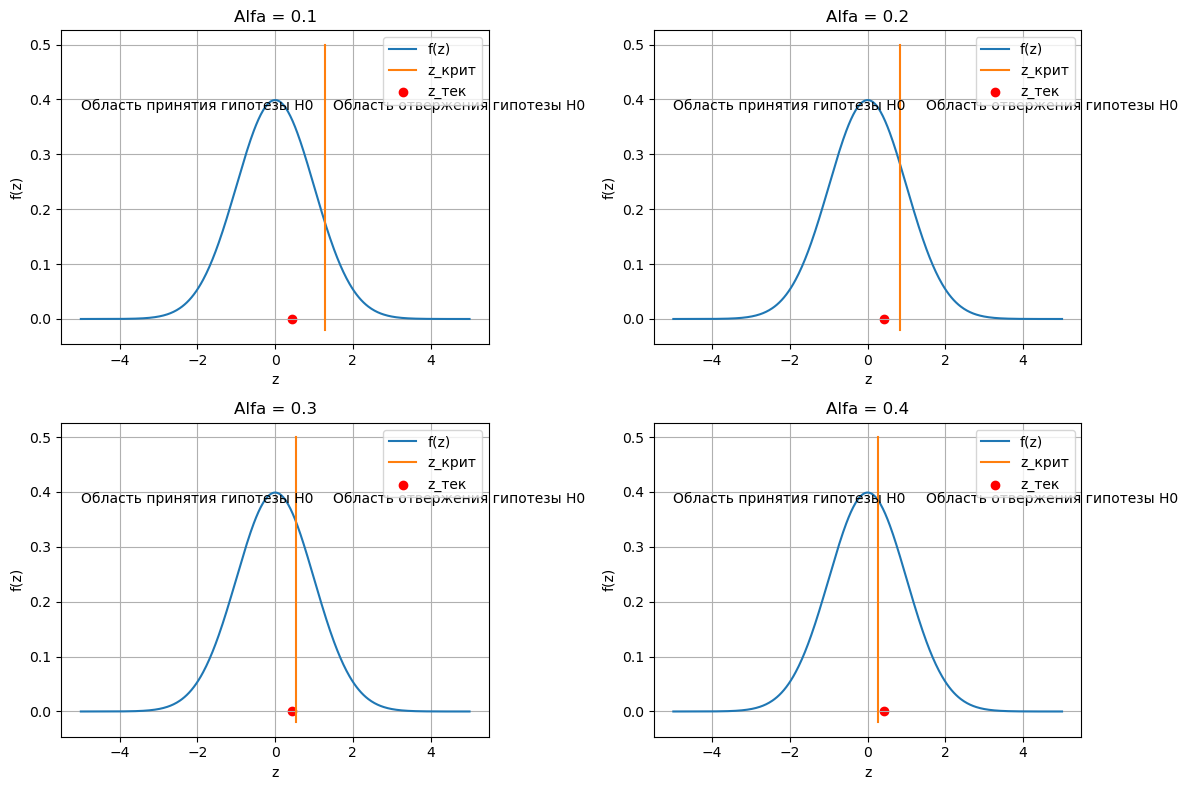

In [25]:
alfa = np.linspace(0.05, 0.4, 36)
alfa_accept = []  # Уровни значимости, при которых исходная гипотеза принимается
alfa_decline = []  # Уровни значимости, при которых исходная гипотеза отклоняется
alfa_for_plot = [0.1, 0.2, 0.3, 0.4]  # При данных уровнях значимости нарисуем графики
plt.figure(figsize=(12, 8))
count = 1  # Счетчик для подграфиков
for i in alfa:
    laplas_function_value = (1 - 2 * i) / 2  # Значение функции Лапласа
    z_cr = arg(laplace, laplas_function_value)  # Критическое значение аргумента функции Лапласа
    if z_current < z_cr:
        print(f'При alfa={round(i, 2)}\tгипотеза H0 принимается, исходная гипотеза отвергается')
        alfa_decline
    else:
        print(f'При alfa={round(i, 2)}\tгипотеза H0 отвергается, исходная гипотеза принимается')
    if i in alfa_for_plot:
        z = np.linspace(-5, 5, 500)
        plt.subplot(2, 2, count)
        plt.plot(z, st_norm(z, 0, 1))
        plt.plot([z_cr, z_cr], [-0.02, 0.5])
        plt.scatter([z_current], [0], c='r')
        plt.text(-5, 0.38, 'Область принятия гипотезы H0')
        plt.text(1.5, 0.38, 'Область отвержения гипотезы H0')
        plt.title(f'Alfa = {i}')
        plt.xlabel('z')
        plt.ylabel('f(z)')
        plt.legend(['f(z)', 'z_крит', 'z_тек'])
        plt.grid()
        count += 1
plt.tight_layout()
plt.show()

Таким образом, гипотеза "Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин" **принимается при alfa >= 0.34** и **отклоняется при alfa < 0.34**

### 4.2.Проверка 2-й гипотезы

**Формулировка гипотезы:** Работники старше 35 лет пропускают в течение года более 2 рабочих 
дней по болезни значимо чаще своих более молодых коллег.

Для начала из датафрейма **data** извлечем два датафрейма **data_over35** (содержащий сотрудников старше 35 лет с пропусками по болезни более двух дней) и **data_less35** (содержащий сотрудников младше 35 лет с пропусками по болезни более двух дней)

In [26]:
data_over35 = data.loc[(data['Возраст'] > 35) & (data['Количество больничных дней'] > 2), :]
data_over35.index = range(0, data_over35.shape[0])  # Упорядочиваем индексы
data_over35.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,5,42,М
3,4,38,М
4,3,42,Ж


In [27]:
data_less35 = data.loc[(data['Возраст'] <= 35) & (data['Количество больничных дней'] > 2), :]
data_less35.index = range(0, data_less35.shape[0])  # Упорядочиваем индексы
data_less35.head()

,Количество больничных дней,Возраст,Пол
0,4,26,М
1,4,29,М
2,3,34,М
3,4,25,Ж
4,3,29,М


Пусть **x_g** - генеральное среднее количества пропущенных дней у сотрудников старше 35 лет, **y_g** - генеральное среднее количества пропущенных дней у сотрудников моложе 35 лет. Тогда сформулируем нулевую гипотезу **H0: x_g = y_g** и альтернативную гипотезу (в данном случае исходную гипотезу) **H1: x_g > y_g**. При проверке данных гипотез строится правосторонняя критическая область

Вычислим текущее значение z-критерия

In [28]:
z_current = z_test(sample_mean(data_over35), sample_mean(data_less35), 
              sample_disp(data_over35), sample_disp(data_less35),
              data_over35.shape[0], data_less35.shape[0])
z_current

-0.7400020400614725

На разных уровнях значимости будем проверять гипотезы

При alfa=0.05	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.06	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.07	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.08	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.09	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.1	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.11	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.12	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.13	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.14	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.15	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.16	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.17	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.18	гипотеза H0 принимается, исходная гипотеза отвергается
При alfa=0.19	гипотеза H0 принимает

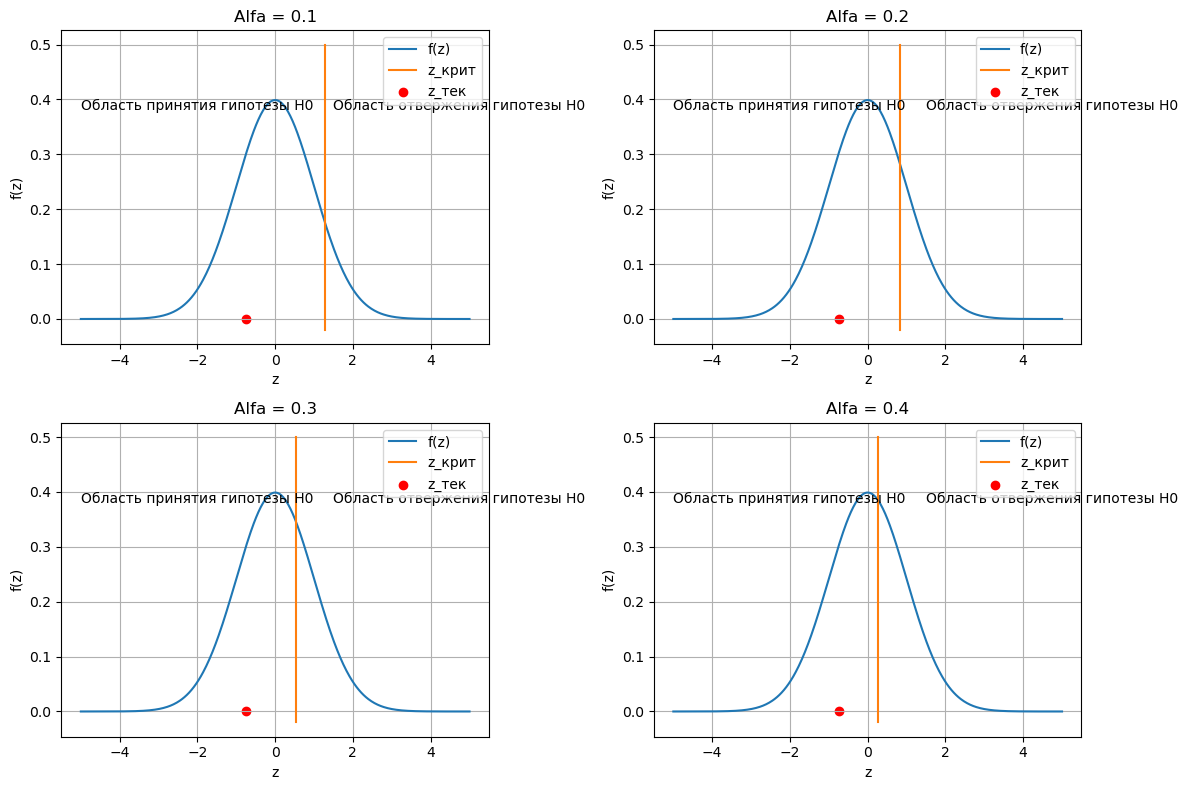

In [29]:
alfa = np.linspace(0.05, 0.4, 36)
alfa_for_plot = [0.1, 0.2, 0.3, 0.4]  # При данных уровнях значимости нарисуем графики
plt.figure(figsize=(12, 8))
count = 1  # Счетчик для подграфиков
for i in alfa:
    laplas_function_value = (1 - 2 * i) / 2  # Значение функции Лапласа
    z_cr = arg(laplace, laplas_function_value)  # Критическое значение аргумента функции Лапласа
    if z_current < z_cr:
        print(f'При alfa={round(i, 2)}\tгипотеза H0 принимается, исходная гипотеза отвергается')
        alfa_decline
    else:
        print(f'При alfa={round(i, 2)}\tгипотеза H0 отвергается, исходная гипотеза принимается')
    if i in alfa_for_plot:
        z = np.linspace(-5, 5, 500)
        plt.subplot(2, 2, count)
        plt.plot(z, st_norm(z, 0, 1))
        plt.plot([z_cr, z_cr], [-0.02, 0.5])
        plt.scatter([z_current], [0], c='r')
        plt.text(-5, 0.38, 'Область принятия гипотезы H0')
        plt.text(1.5, 0.38, 'Область отвержения гипотезы H0')
        plt.title(f'Alfa = {i}')
        plt.xlabel('z')
        plt.ylabel('f(z)')
        plt.legend(['f(z)', 'z_крит', 'z_тек'])
        plt.grid()
        count += 1
plt.tight_layout()
plt.show()

Таким образом, гипотеза "Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег" **отвергается на любых уровнях значимости**